# Long distance flight pricing exploration

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
%matplotlib inline

## Data loading, clean-up and exploration

In [2]:
df = pd.read_csv('flights-WAW-ICN.csv', index_col = 0)

In [3]:
df.head()

,dateFrom,dateTo,flightFrom,flightTo,price,airline,flightDur,stayLen,searchAdv
0,2017-11-01,2017-11-05,WAW,ICN,3097,Etihad Airways,21,4,53
1,2017-11-01,2017-11-05,WAW,ICN,3226,Etihad Airways,21,4,53
2,2017-11-01,2017-11-05,WAW,ICN,3308,Emirates,19,4,53
3,2017-11-01,2017-11-05,WAW,ICN,3444,Air France,30,4,53
4,2017-11-01,2017-11-05,WAW,ICN,3655,Air France,30,4,53


In [4]:
df.describe()

,price,flightDur,stayLen,searchAdv
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,3394.944365,19.050357,30.556348,172.881027
std,6001.014399,8.023624,14.996772,91.518607
min,1750.000000,9.000000,4.000000,4.000000
25%,2210.000000,14.000000,27.000000,89.000000
50%,2522.000000,17.000000,28.000000,199.000000
75%,2841.500000,19.000000,29.000000,233.000000
max,79868.000000,59.000000,90.000000,334.000000


In [5]:
df= df.loc[df['price'] < 4000]

In [6]:
df.describe()

,price,flightDur,stayLen,searchAdv
count,6603.000000,6603.000000,6603.000000,6603.000000
mean,2526.138876,18.899894,30.945934,177.317129
std,411.094798,7.922363,15.228899,90.852754
min,1750.000000,9.000000,4.000000,4.000000
25%,2190.000000,14.000000,27.000000,108.000000
50%,2494.000000,17.000000,28.000000,203.000000
75%,2736.000000,19.000000,29.000000,234.000000
max,3992.000000,59.000000,90.000000,334.000000


In [7]:
def date_converter(dateStr):
    year = int(dateStr[:4])
    month = int(dateStr[5:7])
    day = int(dateStr[8:10])
    return datetime.date(year, month, day)

In [8]:
def gen_categories(minValue,maxValue,step):
    categories = [(0,minValue)]
    for i in range(minValue,maxValue,step):
        categories.append((i,i+step))
    return categories

In [9]:
def gen_order(categories,reverse=True):
    catList = []
    for j in categories:
        catList.append(str(j[0]) + "-" + str(j[1]))
    if reverse == True:
        return catList[::-1]
    else:
        return catList

In [10]:
priceCatList = gen_categories(1800,4000,200)
priceCatOrder = gen_order(priceCatList)

In [11]:
advCatList = gen_categories(10,300,30)
advCatOrder = gen_order(advCatList)

In [12]:
cat = ""
advCat = []
categories = advCatList
for i in df["searchAdv"].values:
    for j in categories:
        if i > j[0] and i <= j[1]:
            cat = str(j[0]) + "-" + str(j[1])
            break
    advCat.append(cat)
df['advCat'] = pd.Series(advCat,index=df.index)

In [13]:
cat = ""
priceCat = []
categories = priceCatList
for i in df["price"].values:
    for j in categories:
        if i > j[0] and i <= j[1]:
            cat = str(j[0]) + "-" + str(j[1])
            break
    priceCat.append(cat)
df['priceCat'] = pd.Series(priceCat,index=df.index)

## Plotting the data

In [14]:
sns.set(style="white", context="talk")

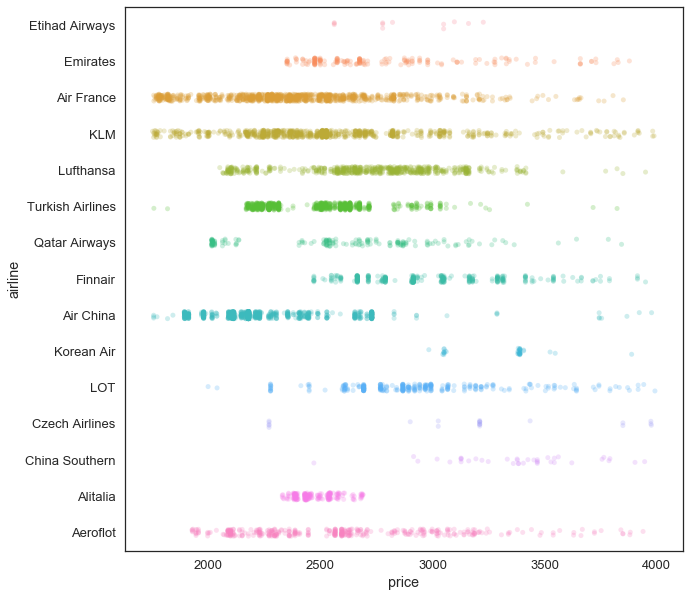

In [15]:
plt.figure(figsize=(10,10))
sns.stripplot(x="price", y="airline",
              data=df, jitter=True,
              alpha=.25, zorder=1)

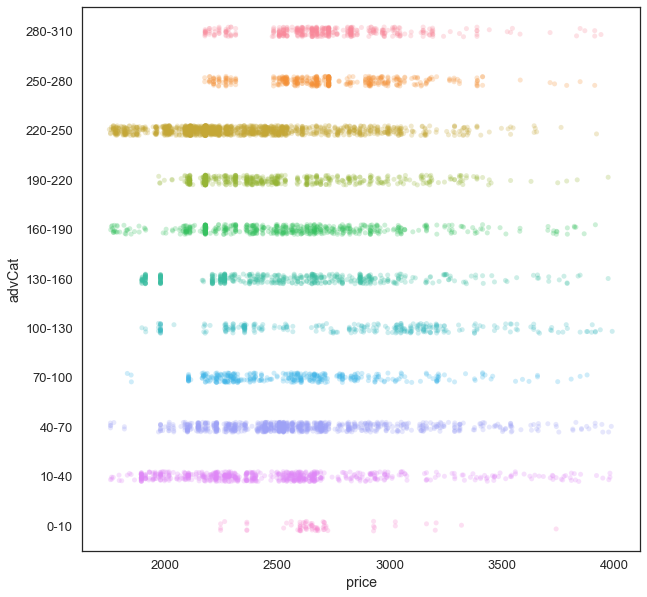

In [16]:
plt.figure(figsize=(10,10))
sns.stripplot(x="price", y="advCat",
              order = advCatOrder,
              data=df, jitter=True,
              alpha=.25, zorder=1)

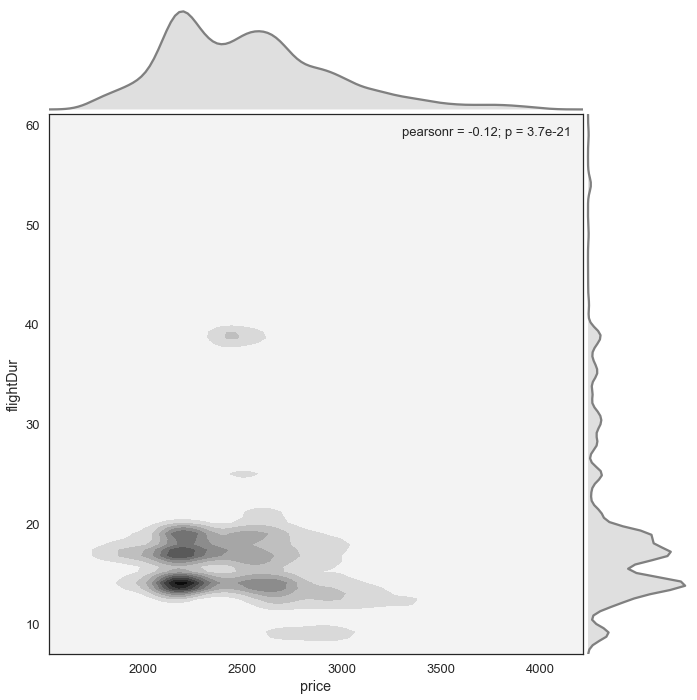

In [17]:
sns.jointplot(x=df.price, y=df.flightDur, kind="kde",size=10, space=0, color="gray")

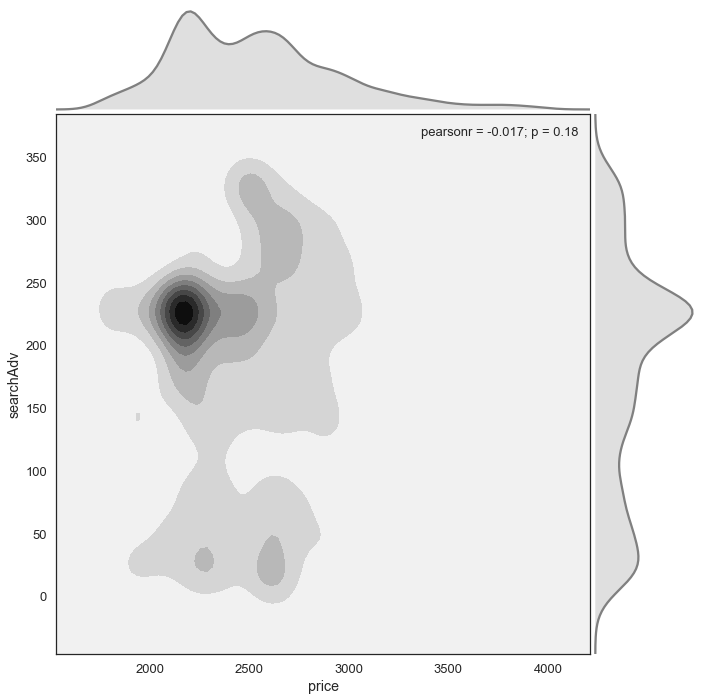

In [18]:
sns.jointplot(x=df.price, y=df.searchAdv, kind="kde",size=10, space=0, color="gray")